In [1039]:
import pandas as pd
from matplotlib import pyplot as plt


In [1040]:
content_df=pd.read_csv('Datasets/Content.csv')
content_df.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [1041]:
content_df.shape

(1000, 6)

In [1042]:
content_df.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

Here we won't be needing the URL column, since it does add any important information to the process
Also get rid of unecessary columns.

In [1043]:
content_df=content_df.drop(['Unnamed: 0','URL','User ID'],axis='columns')
content_df

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [1044]:
content_df.rename(columns={'Type':'Content_type'},inplace=True)
content_df.columns

Index(['Content ID', 'Content_type', 'Category'], dtype='object')

Here if we observe the Category column there are two types of value of same data, like "Studying" and Studying so we'll have to replace the double quotes.  

In [1045]:
content_df['Category'] = content_df['Category'].str.replace('"', '')
content_df

,Content ID,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food
...,...,...,...
995,b4cef9ef-627b-41d7-a051-5961b0204ebb,video,public speaking
996,7a79f4e4-3b7d-44dc-bdef-bc990740252c,GIF,technology
997,435007a5-6261-4d8b-b0a4-55fdc189754b,audio,veganism
998,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,GIF,culture


In [1046]:
#Work on Reactions.csv

In [1047]:
reactions_df=pd.read_csv('Datasets/Reactions.csv')
reactions_df.head()

,Unnamed: 0,Content ID,User ID,Type,Datetime
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [1048]:
#Dimensions
reactions_df.shape

(25553, 5)

In [1049]:
#Drop unnecessary Column
reactions_df=reactions_df.drop(['Unnamed: 0','User ID'],axis='columns')

In [1050]:
reactions_df.shape

(25553, 3)

In [1051]:
#Check for null Values
reactions_df.isna().sum()

Content ID      0
Type          980
Datetime        0
dtype: int64

We have 980 null values in type, also to avoid confusion rename 'type' as 'reaction_type'

In [1052]:
reactions_df=reactions_df.rename(columns={'Type':'Reaction_type'})

In [1053]:
reactions_df.head()

,Content ID,Reaction_type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01


In [1054]:
reactions_df.columns

Index(['Content ID', 'Reaction_type', 'Datetime'], dtype='object')

In [1055]:
reactions_df=reactions_df.dropna(axis=0,how='any')
reactions_df.shape

(24573, 3)

In [1056]:
#Let's Merge both the CSV to get a better understanding

Since Data Preprocessing Is completed we'll proceed with Data Modelling

In [1057]:
main_df = pd.merge(reactions_df, content_df[['Content ID', 'Content_type', 'Category']], on='Content ID', how='left')
main_df

,Content ID,Reaction_type,Datetime,Content_type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [1058]:
reactions_type_df=pd.read_csv('Datasets/ReactionTypes.csv')
reactions_type_df

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [1059]:
reactions_type_df.rename(columns={'Type':'Reaction_type'},inplace=True)
reactions_type_df.columns

Index(['Unnamed: 0', 'Reaction_type', 'Sentiment', 'Score'], dtype='object')

In [1060]:
main_df=pd.merge(main_df,reactions_type_df[['Reaction_type','Sentiment','Score']],on='Reaction_type',how='left')
main_df.head()

,Content ID,Reaction_type,Datetime,Content_type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying,positive,30


In [1061]:
#Here we Can get Top-5 Categories that are Performing with best scores
main_df.shape

(24573, 7)

In [1062]:
selected_columns = ['Score', 'Category']
category_df = main_df[selected_columns]
category_df['Category']=category_df['Category'].str.lower()
category_df.shape

C:\Users\Srinidhi.S\AppData\Local\Temp\ipykernel_11720\1142697827.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['Category']=category_df['Category'].str.lower()


(24573, 2)

These are the scores of individual Categories in Social_Buzz

In [1063]:
grouped_category_df=category_df.groupby(category_df['Category'])
Total_score=grouped_category_df['Score'].sum().reset_index()
print(Total_score)

           Category  Score
0           animals  74965
1           cooking  64756
2           culture  66579
3              dogs  52511
4         education  57436
5           fitness  55323
6              food  66676
7    healthy eating  69339
8   public speaking  49264
9           science  71168
10           soccer  57783
11         studying  54269
12       technology  68738
13           tennis  50339
14           travel  64880
15         veganism  49619


Top-5 Categories

In [1064]:
top5=Total_score.sort_values(by='Score',ascending=False)[:5]
top5

,Category,Score
0,animals,74965
9,science,71168
7,healthy eating,69339
12,technology,68738
6,food,66676


Data Visualizations

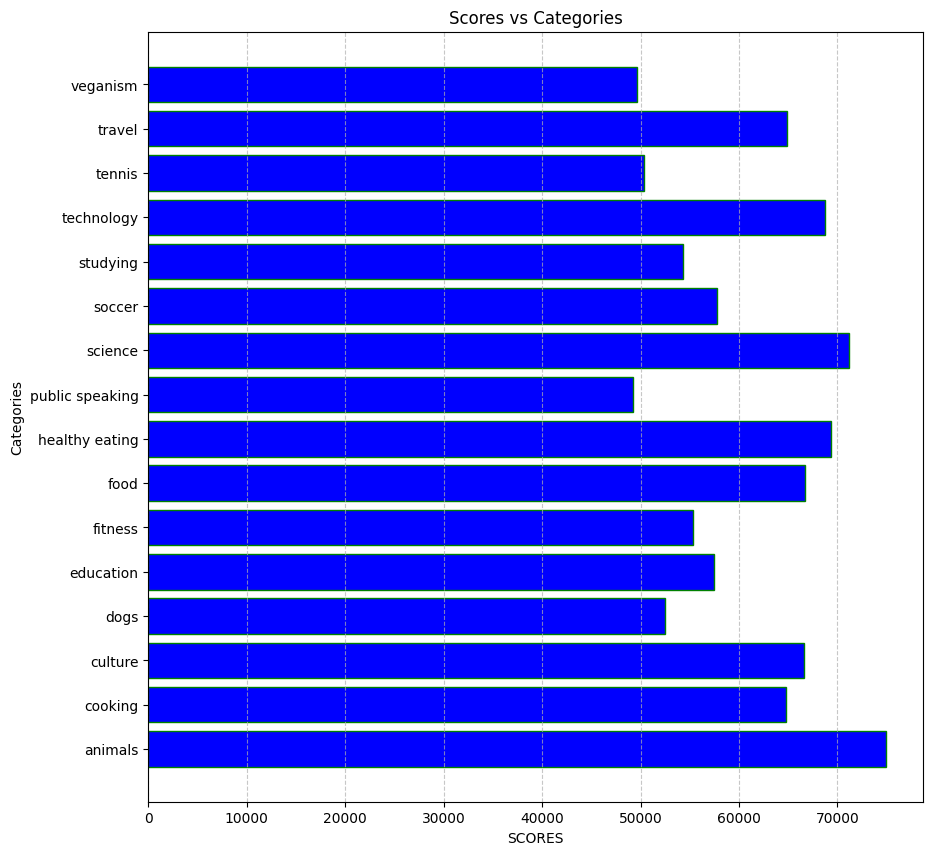

In [1065]:
# Visualize the data to get the best insights of the projects
plt.figure(figsize=(10,10))
plt.barh(Total_score['Category'],Total_score['Score'],edgecolor='green',color='blue')
plt.xlabel("SCORES")
plt.ylabel("Categories")
plt.title("Scores vs Categories")
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

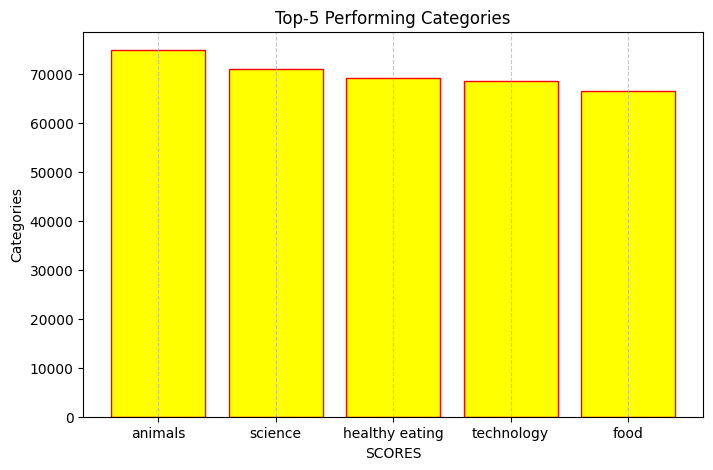

In [1066]:
#Visualize for top5 categories to get the insights of the project

plt.figure(figsize=(8,5))
plt.bar(top5['Category'],top5['Score'],edgecolor='red',color='yellow')
plt.xlabel("SCORES")
plt.ylabel("Categories")
plt.title("Top-5 Performing Categories")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Find the Popularity share among top-5 Categories

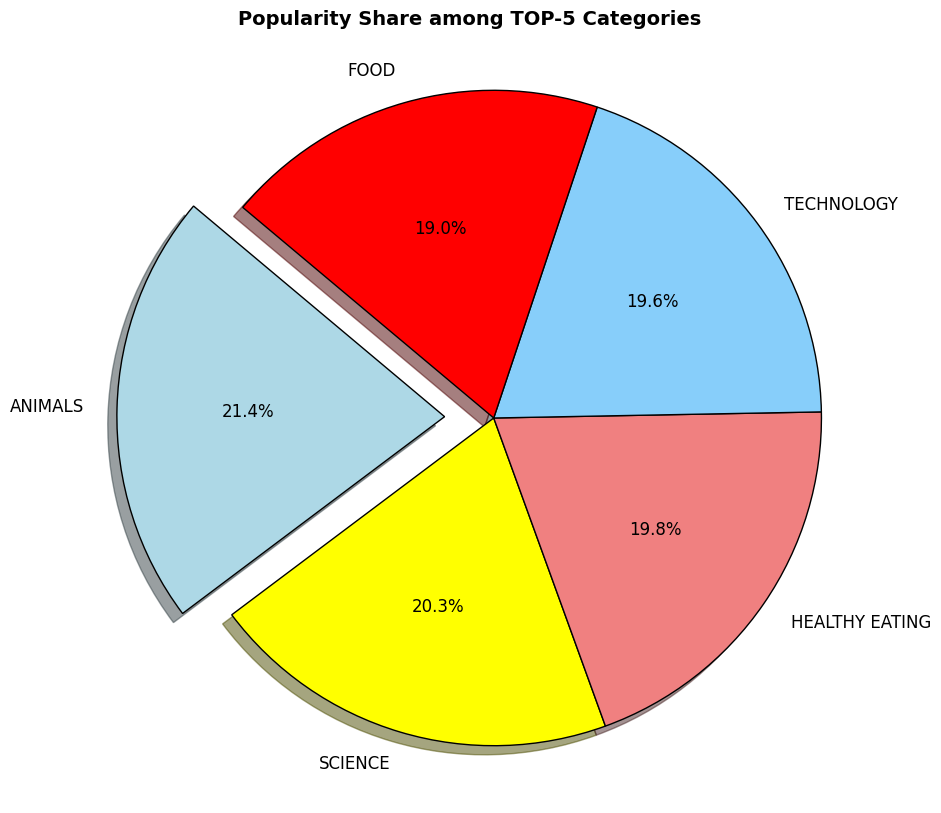

In [1067]:
plt.figure(figsize=(10,10))
colors = ['lightblue', 'yellow', 'lightcoral', 'lightskyblue','red']
explode = (0.15, 0, 0, 0,0)
plt.pie(top5['Score'], explode=explode, labels=top5['Category'].str.upper(), colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140,wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})
plt.title('Popularity Share among TOP-5 Categories', fontsize=14, fontweight='bold') 
plt.axis('equal')
plt.show()